In [50]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [51]:
df = pd.read_excel('Real estate valuation data set.xlsx')
df.drop(df.columns[[0]], axis=1, inplace=True) 
df.head(5)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [52]:
df.rename(
    columns={
        "X1 transaction date": "Transaction_Date", 
        "X2 house age": "House_Age", 
        "X3 distance to the nearest MRT station": "Distance",
        "X4 number of convenience stores": "Num_Stores_NearBy",
        "X5 latitude": "Latitude",
        "X6 longitude": "Longitude",
        "Y house price of unit area": "Target",
    },
    inplace = True
)

In [53]:
df.corr()

,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
Transaction_Date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
House_Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
Distance,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
Num_Stores_NearBy,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Target,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [54]:
abs(df.corr())['Target'].sort_values(ascending=False)

Target               1.000000
Distance             0.673613
Num_Stores_NearBy    0.571005
Latitude             0.546307
Longitude            0.523287
House_Age            0.210567
Transaction_Date     0.087529
Name: Target, dtype: float64

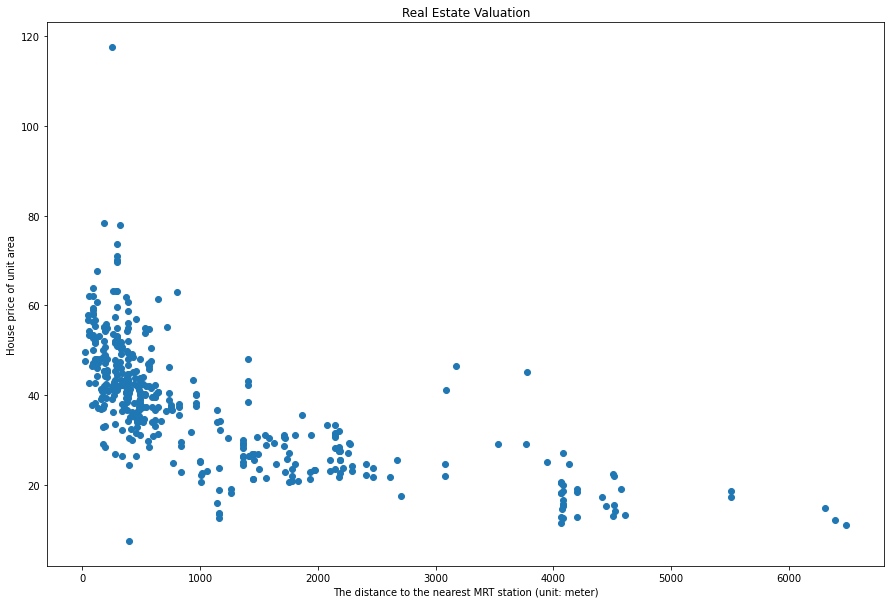

In [55]:
plt.figure(figsize=(15,10))
plt.scatter(x=df['Distance'], y=df['Target'])
plt.xlabel('The distance to the nearest MRT station (unit: meter)')
plt.ylabel('House price of unit area')
plt.title('Real Estate Valuation')
plt.show()

In [56]:
X = np.array(df['Distance']).reshape(-1,1)
y = np.array(df['Target']).reshape(-1,1)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=99)

y_train = y_train.reshape(len(y_train),)
y_valid = y_valid.reshape(len(y_valid),)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape



((331, 1), (83, 1), (331,), (83,))

In [58]:
X_train[1:3]
y_train[1:3]


array([40.3, 33.1])

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(X_train)
x_test_scaled = sc.fit_transform(X_valid)


In [60]:
x_train_scaled[1]

array([-0.0924274])

In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Intercept:  45.753384473881205
Slope:  [-0.00715122]
Mean Absolute Error:  7.488224620599411


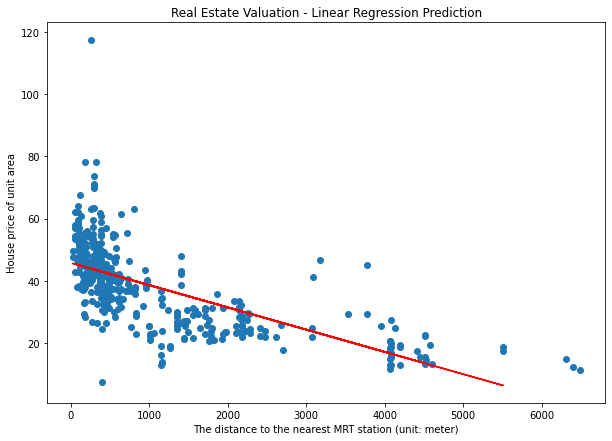

In [63]:
from sklearn.metrics import mean_absolute_error 

print("Intercept: ", lr.intercept_)
print("Slope: ", lr.coef_)
print("Mean Absolute Error: ", mean_absolute_error(y_valid, lr.predict(X_valid)))
    


# Plot outputs
plt.figure(figsize=(10,7))
plt.scatter(x=df['Distance'], y=df['Target'])
plt.plot(X_valid, lr.predict(X_valid), color='red')
plt.xlabel('The distance to the nearest MRT station (unit: meter)')
plt.ylabel('House price of unit area')
plt.title('Real Estate Valuation - Linear Regression Prediction')

plt.show()